# Climate Change Analysis

In [1]:
#import required libraries & Modules
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
print(df.dtypes)
print("Shape of data : ",df.shape)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object
Shape of data :  (645675, 5)


In [4]:
#No of Country and state
df['Country'].nunique() , df['State'].nunique()

(7, 241)

In [5]:
df['Country'].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

## Select India for time-series analysis

In [6]:
df_ind=df[(df['Country'] == 'India')]

In [7]:
df_ind['State'].unique()

array(['Andaman And Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra And Nagar Haveli', 'Daman And Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [8]:
df_maha = df_ind[(df_ind['State'] == 'Maharashtra')]

In [9]:
df_maha.shape

(2613, 5)

In [10]:
#Rename the columns
df_maha.rename(columns={'dt':'Date'},inplace=True)

In [11]:
# make Date column  index
df_maha['Date']=pd.to_datetime(df_maha['Date'])
df_maha.set_index('Date',inplace=True)
df_maha.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=2613, freq=None)

In [12]:
df_maha.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
Date,,,,
1796-01-01,21.195,2.134,Maharashtra,India
1796-02-01,23.250,1.385,Maharashtra,India
1796-03-01,26.075,2.237,Maharashtra,India
1796-04-01,30.374,1.605,Maharashtra,India
1796-05-01,32.132,1.340,Maharashtra,India


In [13]:
#Find the missing value  
df_maha.isnull().sum()

AverageTemperature               105
AverageTemperatureUncertainty    105
State                              0
Country                            0
dtype: int64

## fill misssing value with Rolling average

In [14]:

df_maha['new_avg']= df_maha.AverageTemperature.fillna(df_maha.AverageTemperature.rolling(12,center=True,min_periods=1).mean())

In [15]:
df_maha.isnull().sum()

AverageTemperature               105
AverageTemperatureUncertainty    105
State                              0
Country                            0
new_avg                           71
dtype: int64

In [16]:
df_maha.index.min(),df_maha.index.max()

(Timestamp('1796-01-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [17]:
df_maha.loc['1805':'1820','new_avg'].isnull().sum()

49

In [18]:
df_maha.loc['1862':'1864','new_avg'].isnull().sum()

22

In [19]:
# As between 1862-1864 there are missing value select time-series from 1865

In [20]:
latest_df= df_maha.loc['1865':'2013']

In [21]:
latest_df['new_avg'].isnull().sum()

0

In [22]:
#take data between 1865 to 2013 for analysis

latest_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,new_avg
Date,,,,,
1865-01-01,21.672,1.255,Maharashtra,India,21.672
1865-02-01,23.269,2.237,Maharashtra,India,23.269
1865-03-01,26.381,1.341,Maharashtra,India,26.381
1865-04-01,30.169,1.490,Maharashtra,India,30.169
1865-05-01,31.595,1.656,Maharashtra,India,31.595


In [23]:
latest_df.shape

(1785, 5)

In [24]:
#Rename the columns
latest_df.rename(columns={'new_avg':'Avg_Temp'},inplace=True)

In [25]:
#Resample
resample_df=latest_df[['Avg_Temp']]
resample_df.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [26]:
resample_df.index.min(),resample_df.index.max()


(Timestamp('1865-01-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [27]:
resample_df.shape

(1785, 1)

In [28]:
resample_df.describe()

,Avg_Temp
count,1785.000000
mean,26.113357
std,3.465049
min,18.115000
25%,23.393000
50%,26.057000
75%,28.417000
max,33.801000


In [29]:
resample_df.isnull().sum()

Avg_Temp    0
dtype: int64

# Check for statinarity of time series using DICKEY FULLER TEST

In [30]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Result: ')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Result: 
Test Statistic                   -4.562992
p-value                           0.000151
Lags Used                        25.000000
Number of Observations Used    1759.000000
Critical Value (1%)              -3.434073
Critical Value (5%)              -2.863185
Critical Value (10%)             -2.567645
dtype: float64


In [31]:
latest_df1= resample_df.loc['2005':'2013']

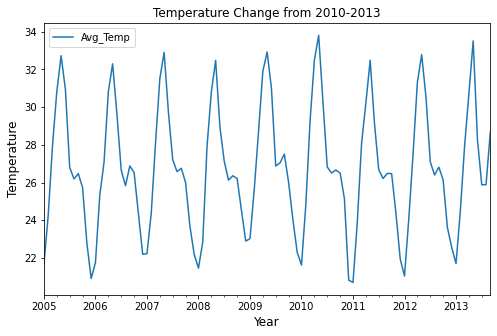

In [32]:
#Plot 
latest_df1.plot(title='Temperature Change from 2010-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

# Substract trend from decompose function

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(latest_df1['Avg_Temp'], model='additive', extrapolate_trend='freq')

In [35]:
latest_df1['decompose_detrend'] = latest_df1['Avg_Temp'] - result_add.trend

In [36]:
latest_df1['decompose_detrend'].head()

Date
2005-01-01   -4.795749
2005-02-01   -2.202460
2005-03-01    1.515830
2005-04-01    4.375119
2005-05-01    6.265409
Name: decompose_detrend, dtype: float64

<AxesSubplot:xlabel='Date'>

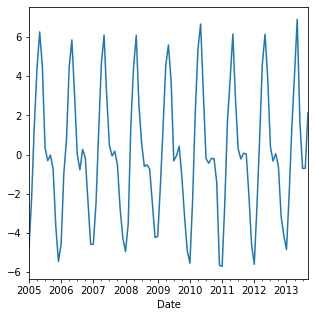

In [37]:
latest_df1['decompose_detrend'].plot()

# check stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Result: ')
test_df=adfuller(latest_df1.loc[:,'decompose_detrend'].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Result: 
Test Statistic                 -4.569276
p-value                         0.000147
Lags Used                      13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


# differencing the lag value

In [41]:
latest_df1['lag1']=latest_df1['Avg_Temp'].shift(2)

In [42]:
latest_df1.loc[:,['Avg_Temp','lag1']].head()

,Avg_Temp,lag1
Date,,
2005-01-01,21.687,NaN
2005-02-01,24.274,NaN
2005-03-01,27.986,21.687
2005-04-01,30.839,24.274
2005-05-01,32.723,27.986


In [43]:
latest_df1['lag_detrend'] = latest_df1['Avg_Temp'] - latest_df1['lag1']

In [44]:
latest_df1['lag_detrend'].head()

Date
2005-01-01      NaN
2005-02-01      NaN
2005-03-01    6.299
2005-04-01    6.565
2005-05-01    4.737
Name: lag_detrend, dtype: float64

<AxesSubplot:xlabel='Date'>

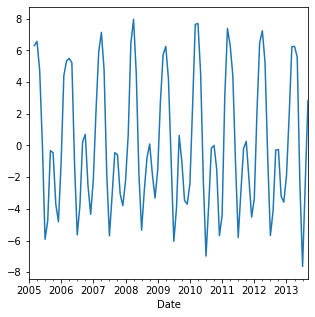

In [45]:
latest_df1['lag_detrend'].plot()

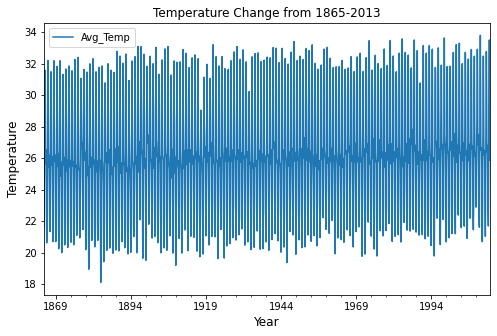

In [112]:
#Plot 
resample_df.plot(title='Temperature Change from 1865-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

# Climate change forcasting


# ARIMA

In [32]:
resample_df.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [33]:
resample_df.shape

(1785, 1)

In [34]:
#AUTO ARIMA
!pip install pmdarima

In [35]:
y=resample_df.Avg_Temp.values

In [36]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [37]:
train, test = train_test_split(resample_df, train_size=int(0.9 * resample_df.shape[0]))

In [38]:
train.shape,test.shape

((1606, 1), (179, 1))

In [39]:
# Fit your model
model = pm.auto_arima( train, start_p=5, max_p=10, seasonal=True, trace = True) #seasonal =False
# random search
# make your forecasts
forecasts = model.predict(test.shape[0])

Performing stepwise search to minimize aic
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=6379.551, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7393.557, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6893.574, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6811.365, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7391.560, Time=0.05 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6401.124, Time=1.68 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=6408.246, Time=1.37 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=5722.736, Time=3.77 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.36 sec
 ARIMA(7,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.14 sec
 ARIMA(6,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=5152.742, Time=3.65 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=6124.180, Time=0.68 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=4712.443, T

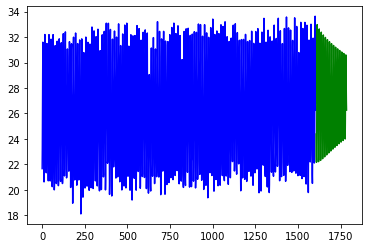

In [40]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(resample_df.shape[0])
plt.plot(x[:1606], train, c='blue')
plt.plot(x[1606:], forecasts, c='green')
plt.show()

In [41]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [42]:
train_size = int(0.9 * resample_df.shape[0])
test_size = resample_df.shape[0] - train_size

In [43]:
model = ARIMA(train, order=(10,1,2))#order is p,d,q #0,1,1
model_fit = model.fit()
output = model_fit.forecast(test_size)
output

1998-11-01    24.388139
1998-12-01    22.633261
1999-01-01    22.169313
1999-02-01    23.693028
1999-03-01    27.470967
                ...    
2013-05-01    30.598752
2013-06-01    29.762694
2013-07-01    28.223231
2013-08-01    26.962233
2013-09-01    26.271811
Freq: MS, Name: predicted_mean, Length: 179, dtype: float64

In [44]:
output[0]

24.38813864233744

In [45]:
mean_squared_error(test,output)

1.3173238700353749

In [46]:
mean_squared_error(test,output)**0.5

1.1477473023428872

In [47]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,output)

0.03582196032621585

#  Apply regression on TS using lag values

In [47]:
reg_data=resample_df.copy()

In [48]:
reg_data.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [49]:
reg_data.shape

(1785, 1)

In [50]:
reg_data.columns

Index(['Avg_Temp'], dtype='object')

In [51]:
reg_data['lag1']=reg_data['Avg_Temp'].shift(1)
reg_data['lag2']=reg_data['Avg_Temp'].shift(2)
reg_data['lag3']=reg_data['Avg_Temp'].shift(3)
reg_data['lag4']=reg_data['Avg_Temp'].shift(4)
reg_data['lag5']=reg_data['Avg_Temp'].shift(5)

In [52]:
reg_data.head(10)

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1865-01-01,21.672,NaN,NaN,NaN,NaN,NaN
1865-02-01,23.269,21.672,NaN,NaN,NaN,NaN
1865-03-01,26.381,23.269,21.672,NaN,NaN,NaN
1865-04-01,30.169,26.381,23.269,21.672,NaN,NaN
1865-05-01,31.595,30.169,26.381,23.269,21.672,NaN
1865-06-01,29.872,31.595,30.169,26.381,23.269,21.672
1865-07-01,26.461,29.872,31.595,30.169,26.381,23.269
1865-08-01,25.665,26.461,29.872,31.595,30.169,26.381
1865-09-01,26.528,25.665,26.461,29.872,31.595,30.169


In [53]:
df_r=reg_data.loc['1865-06-01':,:]

In [54]:
df_r.shape

(1780, 6)

In [55]:
df_r.columns

Index(['Avg_Temp', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5'], dtype='object')

In [56]:
df_r.head()

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1865-06-01,29.872,31.595,30.169,26.381,23.269,21.672
1865-07-01,26.461,29.872,31.595,30.169,26.381,23.269
1865-08-01,25.665,26.461,29.872,31.595,30.169,26.381
1865-09-01,26.528,25.665,26.461,29.872,31.595,30.169
1865-10-01,25.409,26.528,25.665,26.461,29.872,31.595


#  X & Y split 

In [57]:
X = df_r.drop(['Avg_Temp'],axis=1)
Y = df_r['Avg_Temp']

In [58]:
X.shape, Y.shape

((1780, 5), (1780,))

In [59]:
size = int(len(X) * 0.9)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train, Y_test = Y[0:size], Y[size:len(X)]

In [60]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((1602, 5), (178, 5), (1602,), (178,))

#  Apply regression algorithm

## Linear regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
reg = LinearRegression().fit(X_train, Y_train)

In [63]:
Y_pred = reg.predict(X_test)

In [64]:
mean_squared_error(Y_test,Y_pred)

2.108271604637158

In [65]:
mean_squared_error(Y_test,Y_pred)**0.5

1.4519888445291713

In [66]:
mean_absolute_percentage_error(Y_test,Y_pred)

0.044566891867486705

## RandomForestRegressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [68]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=7)

In [69]:
Y_pred_rfr = rfr.predict(X_test)

In [70]:
mean_squared_error(Y_test,Y_pred_rfr)

0.7370243491028062

In [71]:
mean_squared_error(Y_test,Y_pred_rfr)**0.5

0.8585012225400767

In [72]:
mean_absolute_percentage_error(Y_test,Y_pred_rfr)

0.02466315438824934

# LSTM_Time_series

In [31]:
resample_df.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


<AxesSubplot:xlabel='Date'>

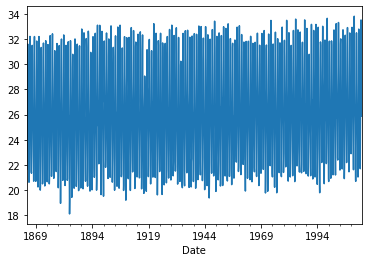

In [32]:
resample_df['Avg_Temp'].plot()

In [33]:
lstm_data=resample_df[['Avg_Temp']].copy()

In [34]:
lstm_data.shape

(1785, 1)

In [35]:
lstm_data.head()

,Avg_Temp
Date,
1865-01-01,21.672
1865-02-01,23.269
1865-03-01,26.381
1865-04-01,30.169
1865-05-01,31.595


In [36]:
dataset_train = lstm_data.iloc[:2565,:]
dataset_train.shape

(1785, 1)

In [37]:
# Convert data frame / series to numpy array
training_set = dataset_train.iloc[:, 0].values
training_set[:5]

array([21.672, 23.269, 26.381, 30.169, 31.595])

In [38]:
training_set.shape

(1785,)

# Add extra dimemsion to the data for processing in RNN / LSTM neuron

In [39]:
# Add extra dim for processing purpose
training_set = training_set.reshape(-1,1)

In [40]:
training_set[:5]

array([[21.672],
       [23.269],
       [26.381],
       [30.169],
       [31.595]])

In [41]:
training_set.shape

(1785, 1)

<AxesSubplot:>

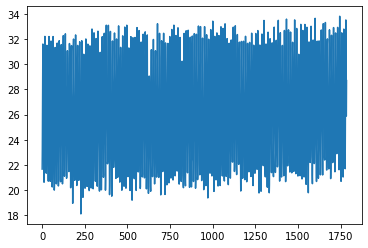

In [42]:
pd.Series(training_set.flat).plot()

In [43]:
#Transform time series for having lag values and output variable

In [44]:
timesteps=5 # How many lag Values to train the data
trn_size = dataset_train.shape[0]

In [45]:
# add lag values to train dataset
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set[i-timesteps:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [46]:
X_train.shape

(1780, 5)

In [47]:
y_train.shape

(1780,)

In [48]:
X_train[:1]

array([[21.672, 23.269, 26.381, 30.169, 31.595]])

In [49]:
y_train[:1]

array([29.872])

In [50]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,21.672,23.269,26.381,30.169,31.595
1,23.269,26.381,30.169,31.595,29.872
2,26.381,30.169,31.595,29.872,26.461
3,30.169,31.595,29.872,26.461,25.665
4,31.595,29.872,26.461,25.665,26.528


## Reshape X_train to add extra dimension

In [51]:
#It is added to be processed easily by RNN / LSTM
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [52]:
X_train.shape

(1780, 5, 1)

In [53]:
X_train[:1]

array([[[21.672],
        [23.269],
        [26.381],
        [30.169],
        [31.595]]])

## Building the LSTM

In [54]:
import tensorflow as tf
from tensorflow import keras

In [55]:
type(X_train)

numpy.ndarray

In [56]:
(X_train.shape[1],X_train.shape[2])

(5, 1)

In [63]:
#create the model

model_lstm = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm.add(keras.layers.LSTM(units=10,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_absolute_percentage_error'])

In [64]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN to the Training set

In [65]:
history = model_lstm.fit( X_train, y_train, validation_split=0.1,epochs = 50, batch_size = 10)

Epoch 1/50
161/161 [==============================] - 5s 13ms/step - loss: 673.1332 - mean_absolute_percentage_error: 98.5611 - val_loss: 634.3835 - val_mean_absolute_percentage_error: 93.4455
Epoch 2/50
161/161 [==============================] - 1s 6ms/step - loss: 524.9119 - mean_absolute_percentage_error: 86.5387 - val_loss: 449.0901 - val_mean_absolute_percentage_error: 78.0759
Epoch 3/50
161/161 [==============================] - 1s 6ms/step - loss: 387.5396 - mean_absolute_percentage_error: 73.8898 - val_loss: 378.1350 - val_mean_absolute_percentage_error: 71.3372
Epoch 4/50
161/161 [==============================] - 1s 8ms/step - loss: 328.0193 - mean_absolute_percentage_error: 67.6528 - val_loss: 323.4047 - val_mean_absolute_percentage_error: 65.6791
Epoch 5/50
161/161 [==============================] - 1s 6ms/step - loss: 279.4755 - mean_absolute_percentage_error: 62.0900 - val_loss: 276.9742 - val_mean_absolute_percentage_error: 60.4760
Epoch 6/50
161/161 [===================

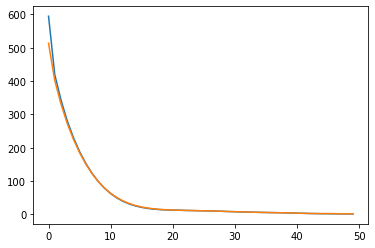

In [102]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#  Tunning LSTM

In [66]:
#create the model

model_lstm1 = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm1.add(keras.layers.LSTM(units=20,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm1.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_absolute_percentage_error'])

In [67]:
model_lstm1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20)                1760      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [68]:
history1 = model_lstm1.fit( X_train, y_train, validation_split=0.1,epochs = 100, batch_size = 20)

Epoch 1/100
81/81 [==============================] - 4s 15ms/step - loss: 643.2472 - mean_absolute_percentage_error: 96.3087 - val_loss: 612.5920 - val_mean_absolute_percentage_error: 91.7362
Epoch 2/100
81/81 [==============================] - 0s 6ms/step - loss: 485.5126 - mean_absolute_percentage_error: 83.0410 - val_loss: 439.4866 - val_mean_absolute_percentage_error: 77.1852
Epoch 3/100
81/81 [==============================] - 1s 9ms/step - loss: 365.7030 - mean_absolute_percentage_error: 71.5901 - val_loss: 329.0288 - val_mean_absolute_percentage_error: 66.2715
Epoch 4/100
81/81 [==============================] - 1s 7ms/step - loss: 261.9486 - mean_absolute_percentage_error: 59.9112 - val_loss: 244.4088 - val_mean_absolute_percentage_error: 56.5526
Epoch 5/100
81/81 [==============================] - 0s 5ms/step - loss: 201.4209 - mean_absolute_percentage_error: 51.9380 - val_loss: 193.8885 - val_mean_absolute_percentage_error: 49.8712
Epoch 6/100
81/81 [=========================

81/81 [==============================] - 0s 4ms/step - loss: 0.7864 - mean_absolute_percentage_error: 2.7063 - val_loss: 1.1376 - val_mean_absolute_percentage_error: 3.0098
Epoch 89/100
81/81 [==============================] - 1s 9ms/step - loss: 0.7713 - mean_absolute_percentage_error: 2.6742 - val_loss: 1.0368 - val_mean_absolute_percentage_error: 2.8989
Epoch 90/100
81/81 [==============================] - 0s 6ms/step - loss: 0.7785 - mean_absolute_percentage_error: 2.6869 - val_loss: 1.2641 - val_mean_absolute_percentage_error: 3.0961
Epoch 91/100
81/81 [==============================] - 0s 6ms/step - loss: 0.7798 - mean_absolute_percentage_error: 2.6700 - val_loss: 1.3681 - val_mean_absolute_percentage_error: 3.1915
Epoch 92/100
81/81 [==============================] - 1s 9ms/step - loss: 0.7804 - mean_absolute_percentage_error: 2.6922 - val_loss: 1.0098 - val_mean_absolute_percentage_error: 2.8278
Epoch 93/100
81/81 [==============================] - 1s 9ms/step - loss: 0.7681 - 

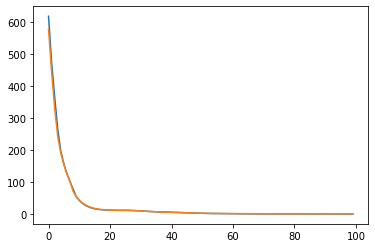

In [106]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# Prophet

In [107]:
# !pip install pystan fbprophet

In [108]:
import pandas as pd
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
resample_df.head()

In [ ]:
pro_data=resample_df.copy()

In [ ]:
pro_data.reset_index(level=0, inplace=True)

In [ ]:
pro_data.rename(columns={'Date':'ds','Avg_temp':'y'},inplace=True)

In [ ]:
pro_data.head()

In [ ]:
pro_data.shape

In [ ]:
pro_data.dtypes

In [ ]:
m = Prophet()
m.fit(pro_data)


In [ ]:
future = m.make_future_dataframe(periods=12)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
fig1 = m.plot(forecast)